# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [1]:
# Libraries
import numpy as np
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

In [2]:
# your code here
#rvs(loc=0, scale=1, size=1, random_state=None)
mean = 50
std = 5
sample_size=[10, 50, 500, 5000]
random_samples = [[norm.rvs(loc=mean, scale=std, size=elem)] for elem in sample_size]



#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](../images/ch-1.png)

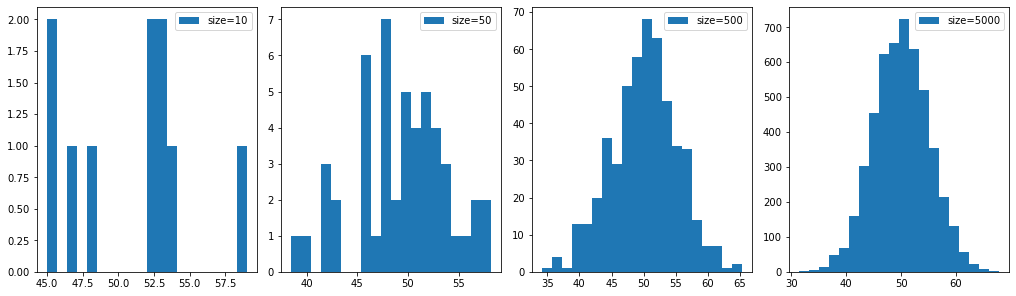

In [3]:


fig = plt.figure(figsize=[14,4],constrained_layout=True)
spec = gridspec.GridSpec(ncols=4, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[0, 3])
ax1.hist(random_samples[0], align='mid', label='size=10',bins=20)
ax2.hist(random_samples[1], align='mid', label='size=50',bins=20)
ax3.hist(random_samples[2], align='mid', label='size=500',bins=20)
ax4.hist(random_samples[3], align='mid', label='size=5000',bins=20)
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()



#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

"""
your comments here
"""

The higher the sample's size taken the more accurate the gaussian bell shape is. 

#### Bonus: Plot normal distributions.

Even though you still don't know how to use matplotlib, as a bonus challenge, you can try to reproduce the plot above using the samples you have created. This plotting library will be introduced later this week, so don't worry if you don't manage to get the results you want now: you can always come back to solve this challenge later.

In [4]:
# your code here

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

In [5]:
# your code here
n = 5
p = 0.15
dist = binom(n, p)


#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](../images/ch-2.png)

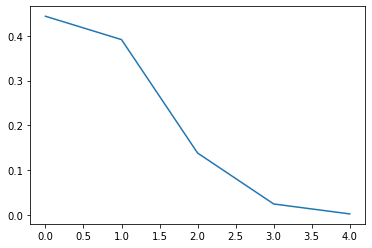

In [6]:
# run this code
x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Step 3: Explain what you observe from the plot above.

In [7]:
"""
your comments here

With a sample of 5 people, there is a around 40% that at least 1 person clicks the ad. 
Then it goes down. For a second person to click the prob will be around 0.15.

"""

'\nyour comments here\n\nWith a sample of 5 people, there is a around 40% that at least 1 person clicks the ad. \nThen it goes down. For a second person to click the prob will be around 0.15.\n\n'

#### Step 4: Now plot PMF with 50, 500, and 5000 visitors.
To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

[<scipy.stats._distn_infrastructure.rv_frozen object at 0x00000298095C4AF0>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000298095FB910>]
[<scipy.stats._distn_infrastructure.rv_frozen object at 0x00000298095C4AF0>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000298095FB910>, <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000298097C1850>]


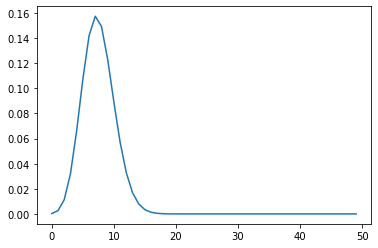

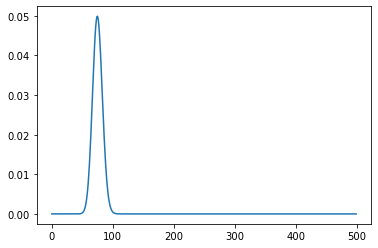

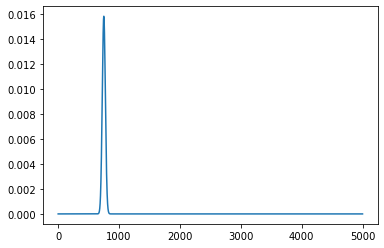

In [8]:
n = 5
p = 0.15
dist = []
visitors = [50, 500, 5000]
for number in visitors:
    dist.append(binom(number, p))
    print(dist)
    
for elem in range(len(visitors)):
    x = range(visitors[elem])

    fig, ax = plt.subplots(1, 1)
    plt.plot(x, dist[elem].pmf(x))
    plt.show()

#### Step 5: What did you notice from the distribution plots? Comment your findings.

"""
your comments here

The highest values is around the 15% of the size. The higher the sample size the clearer this is.
"""

# Challenge 3
#### Step 1: Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

"""
your comments here

Poisson is a type of distribution used to measure the probability of something happening
a number of times during the a certain period of times. The events are independent and are
defined by a constant.

"""



#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [11]:
# your code here

λ = 300
k = 320
p = poisson.pmf(k, λ)
print(f"The probability is: {round(p*100,3)}%")

The probability is: 1.161%


#### Step 3: What is the probability of getting 60 visits?

In [12]:
# your code here

λ = 300
k = 60

p = poisson.pmf(k, λ)
print(f"The probability is: {round(p*100,3)}%")

The probability is: 0.0%


#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [13]:
# your code here
λ = 300
arr = [poisson.pmf(k, λ) for k in range(1001)]


#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](../images/ch-3.png)

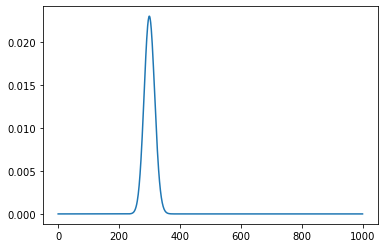

In [14]:
# run this code
plt.plot(arr)
plt.show()

# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [15]:
# your code here

mean = 35
std = 8
delivery_35 = norm.cdf(mean, loc=mean, scale=std)
delivery_30 = norm.cdf(30, loc=mean, scale=std)
print(f"Probability that mean delivery falls between 30 and 35 minutes is: {round((cum_35-cum_30)*100,2)}%")

NameError: name 'cum_35' is not defined

#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [19]:
# your code here
mean_200 = 115*60/200
#this is the probability of taking 115 hours.
delivery_200 = norm.cdf(mean_200, loc=mean, scale=std)
#to calculate the prob of taking more hours:
print(f"The probability that in total, it takes more than 115 hours to deliver all 200 packages is: {round((1-delivery_200)*100,2)}%")



The probability that in total, it takes more than 115 hours to deliver all 200 packages is: 52.49%


# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X → N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [26]:
# your code here

mean = 200
std = 40
n = 300
prob = 1 - norm.cdf(n,mean, std)
print(f' The probability that the monthly sales are more than 300 is: {round(prob, 4)*100}%')

 The probability that the monthly sales are more than 300 is: 0.62%


#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [31]:
# your code here

n2 = 240
n1 = 160
#the probability will be equal to the probability of the hihgest less the probability of the lowest
prob = norm.cdf(n2, mean, std) - norm.cdf(n1, mean, std)
print(f' The probability that the monthly sales fall between 160 and 240 is: {round(prob, 2)*100}%')

 The probability that the monthly sales fall between 160 and 240 is: 68.0%


#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [32]:
# your code here
n = 150
prob = norm.cdf(n,mean, std)
print(f' The probability that the monthly sales do not exceed 150 is: {round(prob, 2)*100}%')

 The probability that the monthly sales do not exceed 150 is: 11.0%


#### Step 4: Find the probability that the monthly sales exceed 3000.

In [34]:
# your code here
n = 3000
prob = 1 - norm.cdf(n,mean, std)
print(f' The probability that the monthly sales exceed 3000 is: {round(prob, 3)*100}%')

 The probability that the monthly sales exceed 3000 is: 0.0%


# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [44]:
# your code here
λ = 4
n = 0
prob = poisson.cdf(n, λ)
print(f' The probability that in a particular month there is no violent robbery is: {round(prob*100, 2)}%')



 The probability that in a particular month there is no violent robbery is: 1.83%


#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [45]:
# your code here

# your code here
λ = 4
n = 0
prob = 1 - poisson.cdf(n, λ)
print(f' The probability that there are at least 1 robbery in a given month is: {round(prob*100, 2)}%')


 The probability that there are at least 1 robbery in a given month is: 98.17%


#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [48]:
# your code here

# your code here
λ = 4
n_max = 6
n_min = 2
prob = poisson.cdf(n_max, λ) - poisson.cdf(n_min, λ)
print(f' The probability that there are between 2 and 6 (inclusive) robberies in a given month is: {round(prob*100, 2)}%')


 The probability that there are between 2 and 6 (inclusive) robberies in a given month is: 65.12%


#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

In [52]:
# your code here

# your code here
λ = 2
n = 2
prob = 1 - poisson.cdf(n, λ)
print(f' The probability that there are more than 2 robberies in 15 days is: {round(prob*100, 2)}%')


 The probability that there are more than 2 robberies in 15 days is: 32.33%
